In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import datasets, linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

In [44]:
data = pd.read_csv('insurance.csv')
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [63]:
df.head()
# corr = df.corr()
# sns.heatmap(corr, square=True, annot=True, linewidths=.5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
target = df['charges']
feature_numerical = df[['age', 'bmi', 'children']]
feature_cat = df[['sex', 'region', 'smoker']]
feature_cat_dummy = pd.get_dummies(feature_cat, drop_first=True)

feature = pd.concat([feature_numerical, feature_cat_dummy], axis=1)
feature.dropna(how='any', inplace=True)

# assuming bmi interact with smoke
feature['bmi_smoker'] = feature.bmi*feature.smoker_yes


In [163]:
# preparing train and test data
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=456)

Linear_Regression - cross_validation - ols_regression_results

r2 in the training set: 0.8428675678615056
r2 in the test set: 0.8293081886819502
mean_absolute_error: 2804.5165139570477
mse: 22149965.78883179
rmse: 4706.375015745323
mean_absolue_percentage_error: 29.07950864024354
[0.84624593 0.88332681 0.81777471 0.91226225 0.85053427 0.84015424
 0.78063649 0.7824932  0.81231914 0.81770046]
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     631.8
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:45:51   Log-Likelihood:                -10602.
No. Observations:                1070   AIC:                         2.122e+04
Df Residuals:                    1060   BIC:                         2.127e+04
Df Model:                           9

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


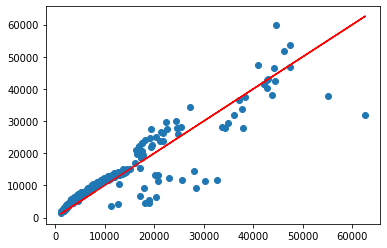

In [208]:
# linear_regression
lrm = linear_model.LinearRegression()

lrm.fit(x_train, y_train)
y_test_pred = lrm.predict(x_test)
y_train_pred = lrm.predict(x_train)
print('r2 in the training set: {}'.format(lrm.score(x_train, y_train)))
print('r2 in the test set: {}'.format(lrm.score(x_test, y_test)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('mse: {}'.format(mse(y_test, y_test_pred)))
print('rmse: {}'.format(rmse(y_test, y_test_pred)))
print('mean_absolue_percentage_error: {}'.format(np.mean(abs((y_test-y_test_pred)/y_test))*100))

# cross_validation
results = cross_val_score(lrm, x_train, y_train, cv=10)
print(results)

# ols_regression_summary
x_train = sm.add_constant(x_train)
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

# from the summary, it seems bmi is not a significant factor, therefore can be removed.
# it seems add_constant to the x_train will reduce the r2. Why?????????????

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, c='r')

Knn_regression

0.87510061272212
0.8755238938176292
r2 in the training set: 0.87510061272212
r2 in the test set: 0.8755238938176292
mean_absolute_error: 2513.975423977612
mse: 18642124.151716866
rmse: 4317.652620547056
mean_absolue_percentage_error: 33.97992720164476


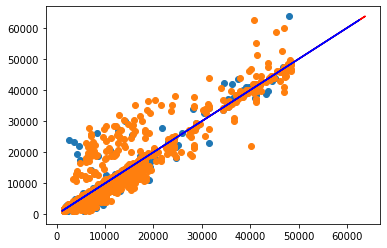

In [226]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=455)

# without weight funcion

from sklearn import neighbors
knn1 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn1.fit(x_train, y_train)
y_test_pred = knn1.predict(x_test)
y_train_pred = knn1.predict(x_train)

plt.scatter(y_test_pred, y_test)
plt.plot(y_test, y_test, c='r')

plt.scatter(y_train_pred, y_train)
plt.plot(y_train, y_train, c='b')

print(knn1.score(x_train, y_train))
print(knn1.score(x_test, y_test))
print('r2 in the training set: {}'.format(knn1.score(x_train, y_train)))
print('r2 in the test set: {}'.format(knn1.score(x_test, y_test)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('mse: {}'.format(mse(y_test, y_test_pred)))
print('rmse: {}'.format(rmse(y_test, y_test_pred)))
print('mean_absolue_percentage_error: {}'.format(np.mean(abs((y_test-y_test_pred)/y_test))*100))

0.9983240933699704
0.8755220080531164
r2 in the training set: 0.9983240933699704
r2 in the test set: 0.8755220080531164
mean_absolute_error: 2504.722504023785
mse: 18642406.572634816
rmse: 4317.685325800714
mean_absolue_percentage_error: 32.606461023831095


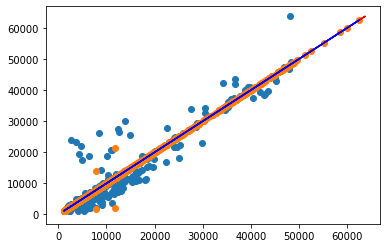

In [227]:
# with weight function
knn2 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn2.fit(x_train, y_train)
y_test_pred = knn2.predict(x_test)
y_train_pred = knn2.predict(x_train)

plt.scatter(y_test_pred, y_test)
plt.plot(y_test, y_test, c='r')

print(knn2.score(x_train, y_train))
print(knn2.score(x_test, y_test))
print('r2 in the training set: {}'.format(knn2.score(x_train, y_train)))
print('r2 in the test set: {}'.format(knn2.score(x_test, y_test)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('mse: {}'.format(mse(y_test, y_test_pred)))
print('rmse: {}'.format(rmse(y_test, y_test_pred)))
print('mean_absolue_percentage_error: {}'.format(np.mean(abs((y_test-y_test_pred)/y_test))*100))

#  adding the weights function lead to a clearly overfitting problem

plt.scatter(y_train_pred, y_train)
plt.plot(y_train, y_train, c='b')


In [229]:
score_without_weights = cross_val_score(knn1, feature, target, cv=5)
score_with_weights = cross_val_score(knn2, feature, target, cv=5)
print(score_with_weights)
print(score_without_weights)
print(score_without_weights.mean(), score_without_weights.std())
print(score_with_weights.mean(), score_with_weights.std())

# the cross validation score indicate a overfitting for both model

[0.85502873 0.75176177 0.87254798 0.82318734 0.84431505]
[0.86162693 0.76052776 0.8735406  0.82053983 0.84423889]
0.8320948006440162 0.03998184232988501
0.8293681749486476 0.04196981050757527


From this study, the knn regression model works better than the OLS regression model